# Decision Tree

Decision Tree is one of the most powerful and popular algorithm. Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

![](https://www.saedsayad.com/images/Decision_Tree_1.png)

### Entropy

Entropy 		
A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). ID3 algorithm uses entropy to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one.

![](https://www.saedsayad.com/images/Entropy.png)

a) Entropy using the frequency table of one attribute:

![](https://www.saedsayad.com/images/Entropy_3.png)

b) Entropy using the frequency table of two attributes:

![](https://www.saedsayad.com/images/Entropy_2.png)

### Information Gain 		
The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).

Step 1: Calculate entropy of the target.

![](https://www.saedsayad.com/images/Entropy_target.png)

Step 2: The dataset is then split on the different attributes. The entropy for each branch is calculated. Then it is added proportionally, to get total entropy for the split. The resulting entropy is subtracted from the entropy before the split. The result is the Information Gain, or decrease in entropy. 

![](https://www.saedsayad.com/images/Entropy_attributes.png)

![](https://www.saedsayad.com/images/Entropy_gain.png)

Step 3: Choose attribute with the largest information gain as the decision node, divide the dataset by its branches and repeat the same process on every branch.

Step 4a: A branch with entropy of 0 is a leaf node.

![](https://www.saedsayad.com/images/Entropy_overcast.png)

Step 4b: A branch with entropy more than 0 needs further splitting.

![](https://www.saedsayad.com/images/Entropy_Sunny.png)

### Decision Tree to Decision Rules
		
A decision tree can easily be transformed to a set of rules by mapping from the root node to the leaf nodes one by one.

![](https://www.saedsayad.com/images/Decision_rules.png)

### Scikit Learn Approach for Decision Tree Classifier

In [13]:
from sklearn import tree
X = [[1, 0], [4, 2],[9,7]]
y = [4,1,2]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [14]:
print(clf.decision_path(X, check_input=True))

  (0, 0)	1
  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 0)	1
  (2, 2)	1
  (2, 4)	1


In [15]:
clf.predict_proba([[5.3,0]], check_input=True)

array([[1., 0., 0.]])

In [16]:
print(clf.predict([[5.3,0]]))

[1]


In [17]:
print(clf.score(X,y))

1.0


### Python Implementation

#### Decision Tree Algorithm Pseudocode

    1. Place the best attribute of our dataset at the root of the tree.
    2. Split the training set into subsets. Subsets should be made in such a way that each subset contains data with the same value for an attribute.
    3. Repeat step 1 and step 2 on each subset until you find leaf nodes in all the branches of the tree.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import Dataset

In [7]:
link="C:/Users/RUKHSUN/Decision Tree/"
df = pd.read_csv(link+"diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##### Check Shape of Dataset

In [5]:
df.shape

(768, 9)

##### Drop the Outcome Data and Create the Predictor Set

In [20]:
X = df.drop(columns=["Outcome"])
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


##### Separate target values and Create Target Set

In [21]:
y = df["Outcome"].values
print(y[0:5])

[1 0 1 0 1]


##### Train Test Split Data

In [22]:
from sklearn.model_selection import train_test_split#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

##### [Train & Test Data Length](#####)

In [23]:
print("Length of Complete Dataset: ",len(df))
print("Length of Predictor Training Dataset: ",len(X_train),"(","%0.2f"%(len(X_train)/len(df)*100),"%)")
print("Length of Predictor Testing Dataset: ",len(X_test),"(","%0.2f"%(len(X_test)/len(df)*100),"%)")
print("Length of Target Training Dataset: ",len(y_train),"(","%0.2f"%(len(y_train)/len(df)*100),"%)")
print("Length of Target Testing Dataset: ",len(y_test),"(","%0.2f"%(len(y_test)/len(df)*100),"%)")

Length of Complete Dataset:  768
Length of Predictor Training Dataset:  537 ( 69.92 %)
Length of Predictor Testing Dataset:  231 ( 30.08 %)
Length of Target Training Dataset:  537 ( 69.92 %)
Length of Target Testing Dataset:  231 ( 30.08 %)


In [24]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


#### Import Libraries

In [25]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#### Create Decision Tree Classifier

In [26]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

#### Train Decision Tree Classifer

In [27]:
clf = clf.fit(X_train,y_train)
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


#### Predict the response for test dataset

In [28]:
y_pred = clf.predict(X_test)
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0]


#### Confusion Matrix

#### Score Calculation

In [29]:
print("Score by DecisionTreeClassifier: ",clf.score(X_test, y_test))
print("Accuracy by Matrics: ",metrics.accuracy_score(y_test, y_pred))

Score by DecisionTreeClassifier:  0.7056277056277056
Accuracy by Matrics:  0.7056277056277056


#### Confusion Matrix

In [30]:
print("Confusion Matrix: \n",metrics.confusion_matrix(y_test,y_pred))

Confusion Matrix: 
 [[116  30]
 [ 38  47]]


#### Crosstab calculation for Original vs Predicted

##### Crosstab for Target

In [31]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,116,30,146
1,38,47,85
All,154,77,231


In [32]:
!pip install pydotplus

In [33]:
!pip install graphviz

In [34]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [35]:
!pip install pydotplus

#### export_graphviz function converts decision tree classifier into dot file and pydotplus convert this dot file to png or displayable form on Jupyter.

### Install graphviz from 
### https://graphviz.gitlab.io/_pages/Download/Download_windows.html

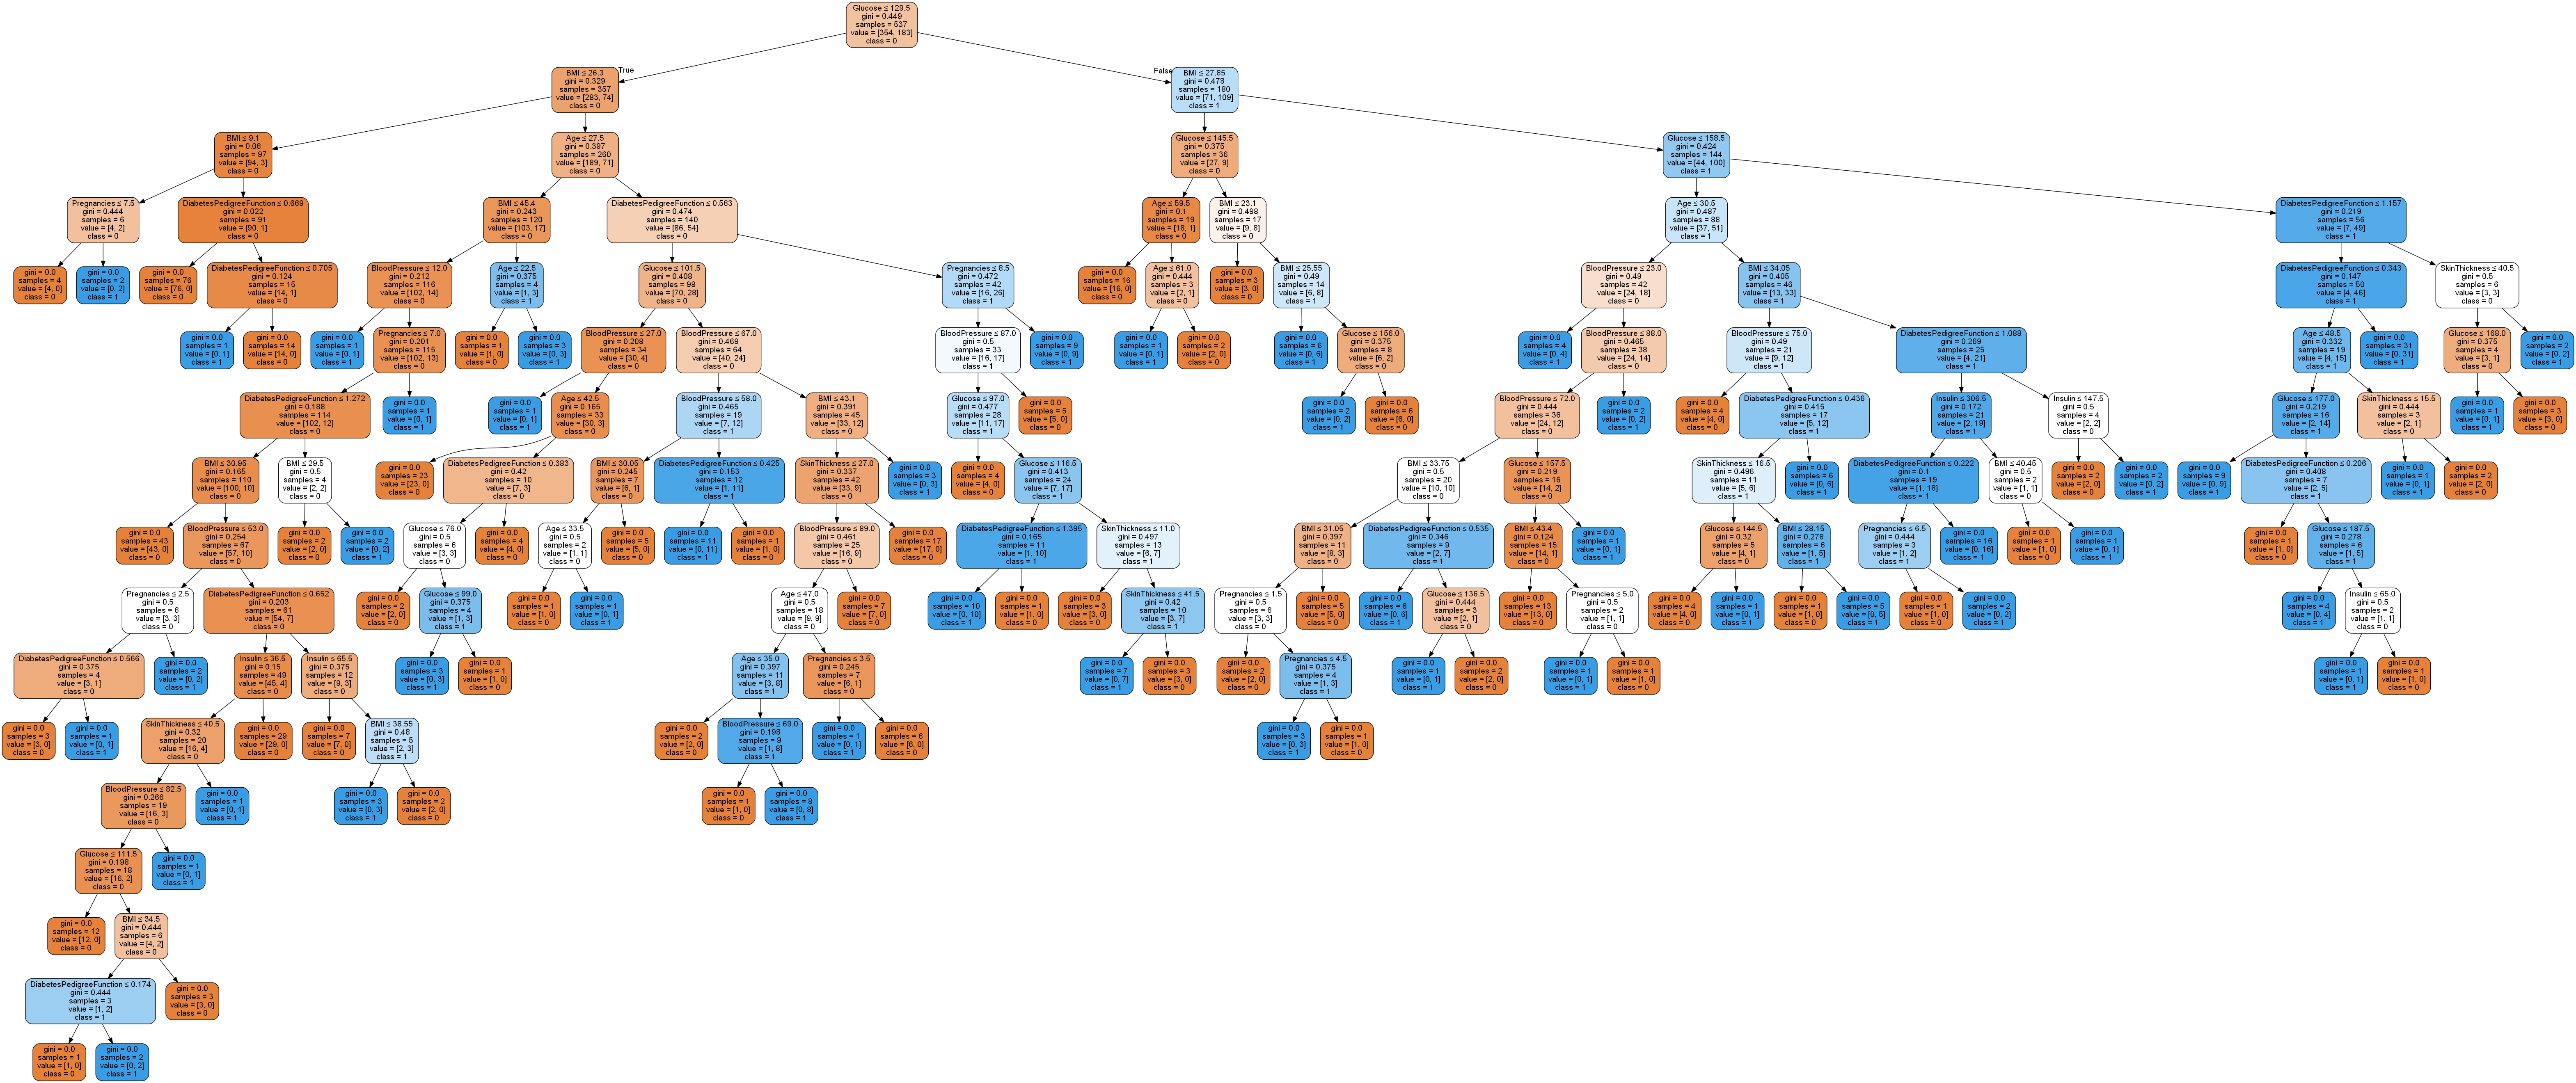

In [37]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

feature_cols=df.columns.tolist()[:-1]

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())